<h1 style="text-align:center;">ESCUELA POLITÉCNICA NACIONAL</h1>
<h2 style="text-align:center;">FACULTAD DE INGENIERÍA DE SISTEMAS</h2>
<h3 style="text-align:center;">INGENIERÍA EN CIENCIA DE LA COMPUTACION</h3>

**PERÍODO ACADÉMICO:** 2025-B  
**ASIGNATURA:** ICCD412 Métodos Numéricos  
**GRUPO:** GR1  
**Tarea 11**   
**ALUMNO:** Carrion Mauricio

In [2]:
import numpy as np

Codigo con los metodos gauss jacobi y gauss seidel

In [3]:
def gauss_jacobi(
    A: np.array, b: np.array, x0: np.array, tol: float, max_iter: int
) -> np.array:
    # --- Validación de los argumentos de la función ---
    if not isinstance(A, np.ndarray):
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1], "La matriz A debe ser de tamaño n-by-(n)."

    if not isinstance(b, np.ndarray):
        b = np.array(b, dtype=float)
    assert b.shape[0] == A.shape[0], "El vector b debe ser de tamaño n."

    if not isinstance(x0, np.ndarray):
        x0 = np.array(x0, dtype=float)
    assert x0.shape[0] == A.shape[0], "El vector x0 debe ser de tamaño n."

    # --- Algoritmo ---
    n = A.shape[0]
    x = x0.copy()
    for k in range(1, max_iter):
        x_new = np.zeros((n, 1))  # prealloc
        for i in range(n):
            suma = sum([A[i, j] * x[j] for j in range(n) if j != i])
            x_new[i] = (b[i] - suma) / A[i, i]

        if np.linalg.norm(x_new - x) < tol:
            return x_new

        x = x_new.copy()

    return x


In [4]:

def gauss_seidel(
    A: np.array, b: np.array, x0: np.array, tol: float, max_iter: int
) -> np.array:
    # --- Validación de los argumentos de la función ---
    if not isinstance(A, np.ndarray):
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1], "La matriz A debe ser de tamaño n-by-(n)."

    if not isinstance(b, np.ndarray):
        b = np.array(b, dtype=float)
    assert b.shape[0] == A.shape[0], "El vector b debe ser de tamaño n."

    if not isinstance(x0, np.ndarray):
        x0 = np.array(x0, dtype=float)
    assert x0.shape[0] == A.shape[0], "El vector x0 debe ser de tamaño n."

    # --- Algoritmo ---
    n = A.shape[0]
    x = x0.copy()

    for k in range(1, max_iter):
        x_new = np.zeros((n, 1))  # prealloc
        for i in range(n):
            suma = sum([A[i, j] * x_new[j] for j in range(i) if j != i]) + sum(
                [A[i, j] * x[j] for j in range(i, n) if j != i]
            )
            x_new[i] = (b[i] - suma) / A[i, i]

        if np.linalg.norm(x_new - x) < tol:
            return x_new

        x = x_new.copy()

    return x



## Conjunto de ejercicios

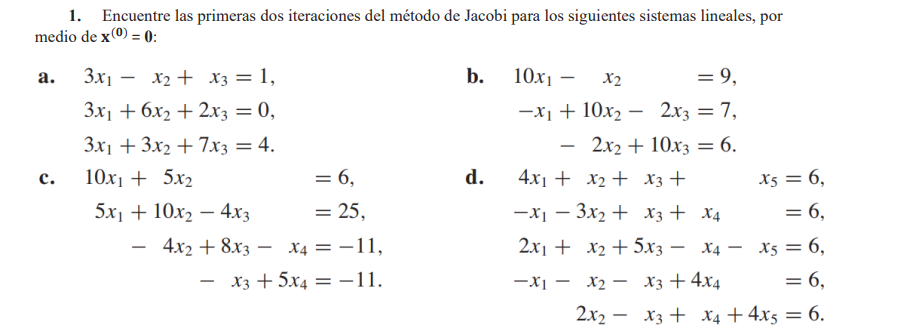
a)


In [5]:

A = [
    [3, -1, 1],
    [3, 6, 2],
    [3, 3, 7]
]

b = [1, 0, 4]

x = gauss_jacobi(A, b, [0, 0, 0], 10e-5, 100)
print(x)


[[ 0.0350863 ]
 [-0.23685698]
 [ 0.65787809]]


b)


In [6]:
A = [
    [10, -1, 1],
    [-1, 10, -2],
    [0, -2, 10]
]

b = [9, 7, 6]

x = gauss_jacobi(A, b, [0, 0, 0], 10e-5, 100)
print(x)


[[0.9159701]
 [0.9495603]
 [0.7899054]]


c)


In [7]:
A = [
    [10, 5, 0, 0],
    [5, 10, -4, 0],
    [0, -4, -8, 1],
    [0, 0, -1, 5]
]

b = [6, 25, -11, -11]

x = gauss_jacobi(A, b, [0, 0, 0, 0], 10e-5, 100)
print(x)


[[-0.78792172]
 [ 2.77583088]
 [-0.29530611]
 [-2.25906474]]


d)


In [8]:
A = [
    [4, 1, 1, 0, 1],
    [-1, -3, 1, 1, 0],
    [2, 1, 5, -1, -1],
    [-1, -1, -1, 4, 0],
    [0, 2, -1, 1, 4]
]

b = [6, 6, 6, 6, 6]

x = gauss_jacobi(A, b, [0, 0, 0, 0, 0], 10e-5, 100)
print(x)


[[ 0.78661584]
 [-1.00257369]
 [ 1.86634212]
 [ 1.91259293]
 [ 1.98974776]]



### 2. Repita el ejercicio 1 usando el método de Gauss-Siedel.

a)


In [9]:
A = [
    [3, -1, 1],
    [3, 6, 2],
    [3, 3, 7]
]

b = [1, 0, 4]

x = gauss_seidel(A, b, [0, 0, 0], 10e-5, 100)
print(x)


[[ 0.03510326]
 [-0.23683891]
 [ 0.6578867 ]]


b)


In [10]:
A = [
    [10, -1, 1],
    [-1, 10, -2],
    [0, -2, 10]
]

b = [9, 7, 6]

x = gauss_seidel(A, b, [0, 0, 0], 10e-5, 100)
print(x)

[[0.91596497]
 [0.94957898]
 [0.7899158 ]]


c)


In [11]:
A = [
    [10, 5, 0, 0],
    [5, 10, -4, 0],
    [0, -4, -8, 1],
    [0, 0, -1, 5]
]

b = [6, 25, -11, -11]

x = gauss_seidel(A, b, [0, 0, 0, 0], 10e-5, 100)
print(x)

[[-0.78791707]
 [ 2.77583885]
 [-0.29530191]
 [-2.25906038]]


d)


In [12]:
A = [
    [4, 1, 1, 0, 1],
    [-1, -3, 1, 1, 0],
    [2, 1, 5, -1, -1],
    [-1, -1, -1, 4, 0],
    [0, 2, -1, 1, 4]
]

b = [6, 6, 6, 6, 6]

x = gauss_seidel(A, b, [0, 0, 0, 0, 0], 10e-5, 100)
print(x)

[[ 0.78663577]
 [-1.00257108]
 [ 1.86632614]
 [ 1.91259771]
 [ 1.98971765]]



### 3. Utilice el método de Jacobi para resolver los sistemas lineales en el ejercicio 1, con $TOL = 10^{-3}$.

a)


In [13]:
A = [
    [3, -1, 1],
    [3, 6, 2],
    [3, 3, 7]
]

b = [1, 0, 4]

x = gauss_jacobi(A, b, [0, 0, 0], 10e-3, 100)
print(x)

[[ 0.03516089]
 [-0.23570619]
 [ 0.65922185]]


b)


In [14]:
A = [
    [10, -1, 1],
    [-1, 10, -2],
    [0, -2, 10]
]

b = [9, 7, 6]

x = gauss_jacobi(A, b, [0, 0, 0], 10e-3, 100)
print(x)

[[0.91603]
 [0.94913]
 [0.78962]]


c)


In [15]:
A = [
    [10, 5, 0, 0],
    [5, 10, -4, 0],
    [0, -4, -8, 1],
    [0, 0, -1, 5]
]

b = [6, 25, -11, -11]

x = gauss_jacobi(A, b, [0, 0, 0, 0], 10e-3, 100)
print(x)

[[-0.788375  ]
 [ 2.77715625]
 [-0.29553125]
 [-2.26032813]]


d)


In [16]:
A = [
    [4, 1, 1, 0, 1],
    [-1, -3, 1, 1, 0],
    [2, 1, 5, -1, -1],
    [-1, -1, -1, 4, 0],
    [0, 2, -1, 1, 4]
]

b = [6, 6, 6, 6, 6]

x = gauss_jacobi(A, b, [0, 0, 0, 0, 0], 10e-3, 100)
print(x)

[[ 0.78718101]
 [-1.00174151]
 [ 1.8658388 ]
 [ 1.91274157]
 [ 1.98672138]]



### 4.Utilice el método de Gauss-Siedel para resolver los sistemas lineales en el ejercicio 1, con $TOL = 10^{-3}$.

a)


In [17]:
A = [
    [3, -1, 1],
    [3, 6, 2],
    [3, 3, 7]
]

b = [1, 0, 4]

x = gauss_seidel(A, b, [0, 0, 0], 10e-3, 100)
print(x)

[[ 0.0361492 ]
 [-0.23660752]
 [ 0.65733928]]


b)


In [18]:
A = [
    [10, -1, 1],
    [-1, 10, -2],
    [0, -2, 10]
]

b = [9, 7, 6]

x = gauss_seidel(A, b, [0, 0, 0], 10e-3, 100)
print(x)

[[0.91593697]
 [0.94956218]
 [0.78991244]]


c)


In [19]:
A = [
    [10, 5, 0, 0],
    [5, 10, -4, 0],
    [0, -4, -8, 1],
    [0, 0, -1, 5]
]

b = [6, 25, -11, -11]

x = gauss_seidel(A, b, [0, 0, 0, 0], 10e-3, 100)
print(x)

[[-0.78802812]
 [ 2.77579328]
 [-0.29528544]
 [-2.25905709]]


d)


In [20]:
A = [
    [4, 1, 1, 0, 1],
    [-1, -3, 1, 1, 0],
    [2, 1, 5, -1, -1],
    [-1, -1, -1, 4, 0],
    [0, 2, -1, 1, 4]
]

b = [6, 6, 6, 6, 6]

x = gauss_seidel(A, b, [0, 0, 0, 0, 0], 10e-3, 100)
print(x)

[[ 0.78616258]
 [-1.00240703]
 [ 1.86606999]
 [ 1.91245638]
 [ 1.98960692]]



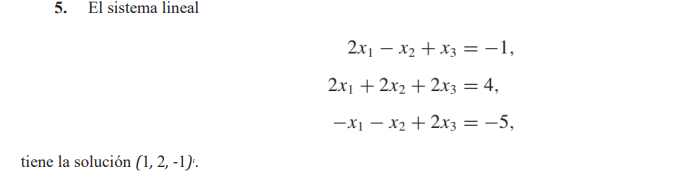

a) Muestre que el método de Jacobi con x(0) = 0 falla al proporcionar una buena aproximación después de 25 iteraciones. 


In [21]:

A = [
    [2, -1, 1],
    [2, 2, 2],
    [-1, -1, 2]
]

b = [-1, 4, -5]

x = gauss_jacobi(A, b, [0, 0, 0], 10e-5, 25)
print(x)


[[ -7.73114914]
 [-32.92459655]
 [  7.73114914]]



b) Utilice el método de Gauss-Siedel con $x(0) = 0$ para aproximar la solución para el sistema lineal 
dentro de $10^{−5}$.


In [22]:

A = [
    [2, -1, 1],
    [2, 2, 2],
    [-1, -1, 2]
]

b = [-1, 4, -5]

x = gauss_seidel(A, b, [0, 0, 0], 10e-5, 25)
print(x)


[[ 0.99998474]
 [ 2.00001717]
 [-0.99999905]]


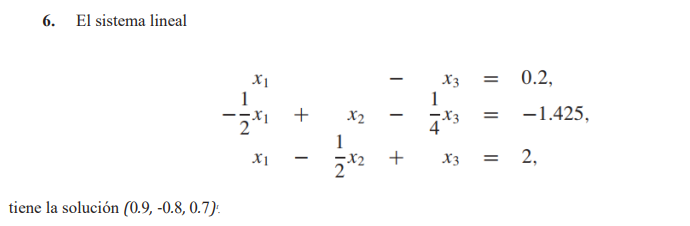

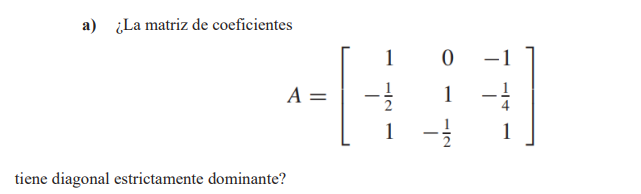

Si, ya que la sumatoria de los valores absolutos de cada fila es menor que el valor absoluto del elemento diagonal correspondiente.

**b) Utilice el método iterativo de Gauss-Siedel para aproximar la solución para el sistema lineal con una tolerancia de $10^{-22}$ y un máximo de 300 iteraciones.**

In [23]:

A = [
    [1, 0, -1],
    [-0.5, 0, -0.25],
    [1, -0.5, 1]
]

b = [0.2, -1.425, 2]

x = gauss_seidel(A, b, [0, 0, 0], 10e-22, 300)
print(x)


[[nan]
 [nan]
 [nan]]


C:\Users\mauri\AppData\Local\Temp\ipykernel_35116\2200652469.py:27: RuntimeWarning: divide by zero encountered in divide
  x_new[i] = (b[i] - suma) / A[i, i]
C:\Users\mauri\AppData\Local\Temp\ipykernel_35116\2200652469.py:25: RuntimeWarning: invalid value encountered in multiply
  [A[i, j] * x[j] for j in range(i, n) if j != i]



c) ¿Qué pasa en la parte b) cuando el sistema cambia por el siguiente?

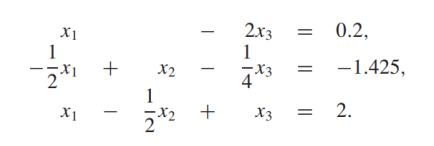

In [24]:

A = [
    [1, 0, -2],
    [-0.5, 0, -0.25],
    [1, -0.5, 1]
]

b = [0.2, -1.425, 2]

x = gauss_seidel(A, b, [0, 0, 0], 10e-22, 300)
print(x)


[[nan]
 [nan]
 [nan]]


C:\Users\mauri\AppData\Local\Temp\ipykernel_35116\2200652469.py:27: RuntimeWarning: divide by zero encountered in divide
  x_new[i] = (b[i] - suma) / A[i, i]
C:\Users\mauri\AppData\Local\Temp\ipykernel_35116\2200652469.py:25: RuntimeWarning: invalid value encountered in multiply
  [A[i, j] * x[j] for j in range(i, n) if j != i]


No converge, ya que la matriz no es diagonal dominante, por lo que el método de Gauss-Siedel no garantiza la convergencia.


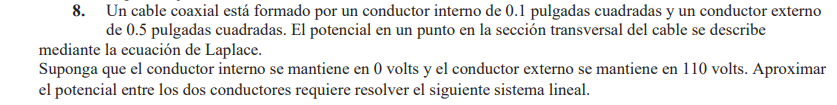

In [25]:

A7 = [
    [4, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0],
    [-1, 4, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, -1, 4, -1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, -1, 4, 0, -1, 0, 0, 0, 0, 0, 0],
    [-1, 0, 0, 0, 4, 0, -1, 0, 0, 0, 0, 0],
    [0, 0, 0, -1, 0, 4, 0, -1, 0, 0, 0, 0],
    [0, 0, 0, 0, -1, 0, 4, 0, -1, 0, 0, 0],
    [0, 0, 0, 0, 0, -1, 0, 4, 0 ,0, 0, -1],
    [0, 0, 0, 0, 0, 0, -1, 0, 4, -1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, -1, 4, -1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 4, -1],
    [0, 0, 0, 0, 0, -1, 0, 0, 0, 0, -1, 4]
]

b7 = [220, 110, 110, 220, 110, 110, 110, 110, 220, 110, 110, 220]



**a) ¿La matriz es estrictamente diagonalmente dominante?**

Si, se puede notar a simple vista, la diagonal está compuesta solo de 4 siendo el mayor numero.

**b) Resuelva el sistema lineal usando el método de Jacobi con $x(0) = 0$ y $TOL = 10^{-2}$.**


In [26]:

x = gauss_jacobi(A7, b7, [0]*len(b7), 10e-2, 300)
print(x)


[[87.98209548]
 [65.98209679]
 [65.98209679]
 [87.98209548]
 [65.98209679]
 [65.98209679]
 [65.98209679]
 [65.98209679]
 [87.98209548]
 [65.98209679]
 [65.98209679]
 [87.98209548]]



**c) Repita la parte b) mediante el método de Gauss-Siedel.**


In [27]:

x = gauss_seidel(A7, b7, [0]*len(b7), 10e-2, 300)
print(x)


[[87.98217949]
 [65.98985217]
 [65.99375664]
 [87.99604191]
 [65.98985217]
 [65.9974727 ]
 [65.99375664]
 [65.99838442]
 [87.99604191]
 [65.9974727 ]
 [65.99838442]
 [87.99896428]]
